# 【問題1】ロジスティック回帰のクラスを作成する
### ロジスティック回帰のクラスを作成し、Sprint2で作成した分類のパイプラインに組み込んでください。
### クラスの基本構造はSprint3の線形回帰を参考にし、名前はScratchLogisticRegressionとしてください。
### メソッドやパラメータなどはscikit-learnを参考にしてください。推定関係ではラベルを出力するpredictメソッドと、確率を出力するpredict_probaメソッドの2種類を作成します。
### sklearn.linear_model.LinearRegression — scikit-learn 0.20.0 documentation
### 検証段階ではJupyter Notebook上で書いていき、最終的にはpyファイルにモジュールとしてまとめてください。


<方針>
<li>確率の予測とラベルの予測は別の関数で行う

In [5]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [15]:
class ScratchLogisticRegression():
    """""
    パラメータ
    --------------------------------
    学習率:
    ir
    
    最急勾配降下法の学習回数:
    iter
    
    重みの多次元時配列
    self.coef_  次の形のndarray, shape (n_features,)
    
    学習データの損失記録:
    self.loss : 次の形のndarray, shape (self.iter,)
    
    検証データの損失記録
    self.val_loss : 次の形のndarray, shape (self.iter,)            
    """""    
    def __init__(self,lr=0.05,iter=10000,ramda=5,bias=True,verbose=True):
        self.lr = lr
        self.iter = iter
        self.ramda = ramda
        self.bias = bias
        #self.coef_ = np.empty(1) #配列は(1,n_features)
        self.verbose = verbose
        
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
        #X_val、y_valの存在を宣言しておく
        self.X_val = None
        self.y_val = None
    
    def sigmoid_(self,X):
        """""
        シグモイド関数の作成 #今回は一旦使わないが...
        """""
        return 1/(1+np.exp(-X))
    
    
    def hypothesis_(self,X):
        """""
        仮説関数
        X行列と重みの内積をシグモイド関数に入れる
        
        重みの初期値は全て1
        
        Xの配列は(n_samples,n_features)
        返す値の配列は(n_sanples,1)
        
        """""
        #self.coef_ = np.ones(X.shape[1]) #クラス外での実験用
        dot = np.dot(X,self.coef_.reshape(-1,1))
        h_theta = self.sigmoid_(dot)
        return h_theta

    def objective_function_(self,X,y):
        """""
        目的関数は交差エントロピーである
        
        返す値の配列は(1,1)
        """""
        return (((-np.log(self.hypothesis_(X))*y)) \
                + (-np.log(1-self.hypothesis_(X))*(1-y))).mean() / X.shape[1]  \
                + self.ramda / (2 * X.shape[1]) * sum(self.coef_**2)
        
    
    
    def fit(self, X, y, X_val=None, y_val=None):
        
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        self.X_val = X_val
        self.y_val = y_val
            
        #　bias を含める場合、学習・検証データの全てのサンプルにx0=1を追加、含めない場合は。。。
        if self.bias == True:
            X = np.hstack([np.c_[np.ones(X.shape[0])],np.c_[X]]) 
            if (X_val is not None) and (y_val is not None): #　検証データがある場合
                self.X_val = np.hstack([np.c_[np.ones(self.X_val.shape[0])],np.c_[self.X_val]])


        
        # coef_初期値を全ての重みが１となるように作成
        self.coef_ = np.ones(X.shape[1])
    
    
        #最急勾配降下法を実施
        for i in range(self.iter):
            y_pred_temp = self.hypothesis_(X) #試行回数i回時点のthetaにおけるy予測確率
            if (X_val is not None) and (y_val is not None): #　検証データがある場合
                y_val_pred_temp = self.hypothesis_(self.X_val) #試行回数i回時点のthetaにおけるy_val予測確率
            
            if self.bias == True: #バイアスありの場合の重み更新
                self.coef_ = self.coef_ - self.lr * ((self.hypothesis_(X)- y) * X).mean(axis=0)  #重み更新　正則化項除く j=0
                self.coef_[1:] = self.coef_[1:] - self.lr * (self.ramda / X.shape[1] * self.coef_[1:]) #重み更新　正則化項部分の更新をバイアス項以外で実施
            else : #バイアスなしの場合の重み更新
                self.coef_ = self.coef_ - self.lr * ((self.hypothesis_(X)- y) * X).mean(axis=0) \
                                - self.coef_ - self.lr * (self.ramda / X.shape[1] * self.coef_)
                
                
            #目的関数のスコア格納
            self.loss[i] = self.objective_function_(X,y) #学習データの目的関数スコアを格納してゆく
            if (X_val is not None) and (y_val is not None): #検証データが存在する場合、目的関数スコアを格納してゆく
                self.val_loss[i] = self.objective_function_(self.X_val,self.y_val)
            
            
        # fit段階で設定した最終的な重みを設定
        self.final_coef_ = self.coef_
        
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print(self.loss)
        
        
    def predict_proba(self,X):
        #　bias を含める場合、全てのサンプルにx0=1を追加
        if self.bias == True:
            X = np.hstack([np.c_[np.ones(X.shape[0])],np.c_[X]])  
        
        #最急勾配効果法を完了した時点でのthetaを使って標準化した場合のｙ_predを予測する
        y_pred_proba = self.hypothesis_(X)
        
        return y_pred

    def predict(self,X):
        #　bias を含める場合、全てのサンプルにx0=1を追加
        if self.bias == True:
            X = np.hstack([np.c_[np.ones(X.shape[0])],np.c_[X]])  
        
        #最急勾配効果法を完了した時点でのthetaを使って標準化した場合のｙ_predを予測する
        y_pred = self.hypothesis_(X)
        y_pred_label = y_pred 
        
        #０．５を境界にしてラベルをつける。
        for i in range(0,y_pred.shape[0]):
            for j in range(0,y_pred.shape[1]):
                if y_pred[i,j] >= 0.5 :
                    y_pred_label[i,j] = 1
                else:
                    y_pred_label[i,j] = 0
                    
        return y_pred_label

    def loss_graph(self):
        #損失関数の遷移
        plt.figure(figsize=(3, 2), dpi=200)
        plt.title('model loss')
        plt.xlabel('iter')
        plt.ylabel('Closs entropy')
        if (self.X_val is not None) and (self.y_val is not None): #　検証データがある場合
            plt.plot(self.val_loss, color='red',label = "val_loss",linewidth=1,linestyle='solid')
        plt.plot(self.loss, color='blue',label = "train_loss",linewidth=1,linestyle='dashed')
        plt.legend()

In [16]:
from sklearn.datasets import load_iris
from sklearn import datasets
import pandas as pd

#データセット読み込み
iris = datasets.load_iris()
X = iris.data
y = iris.target


#データセットの準備 ラベルが０または１のみのデータを抜き出す。
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df_2 = df[df['target'] != 2]

In [17]:
#データの配列変換
X = np.array(df_2.iloc[:,0:2])
y = np.array(df_2.iloc[:,4]).reshape(-1,1)

#学習データ、検証データ分割
from sklearn.model_selection import train_test_split
X, X_val, y, y_val = train_test_split(X, y,test_size=0.3)

In [18]:
X.shape, X_val.shape, y.shape, y_val.shape

((70, 2), (30, 2), (70, 1), (30, 1))

In [19]:
log_regression = ScratchLogisticRegression()
log_regression.fit(X,y,X_val,y_val) # bias = Falseならうまくいく

[3.22607095 2.54071569 1.99254903 ... 0.32660354 0.32660354 0.32660354]


# 【問題2】学習曲線のプロット
###### 学習曲線をプロットしてください

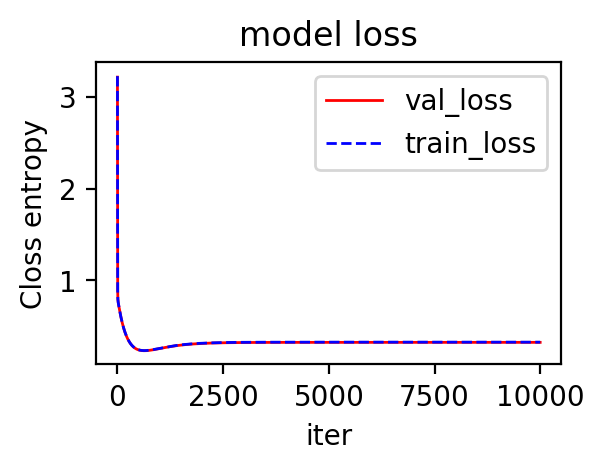

In [20]:
log_regression.loss_graph()

# 【問題3】指標値の算出
###### 分類に関する指標値で精度を確認してください。

正確度 (正解率、Accuracy)  
適合率 (精度、陽性反応的中度、Precision)  
再現率 (感度、真陽性率、Recall)  
F-値 (F-score, F-measure)  
AUC (Area Under the Curve)

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc
y_pred = log_regression.predict(X_val)

print('正解率:', accuracy_score(y_pred,y_val))
print('適合率:', precision_score(y_pred,y_val))
print('再現率:', recall_score(y_pred,y_val))
print('F1スコア:', f1_score(y_pred,y_val))
#print('AUCスコア:', auc(y_pred,y_val))

正解率: 1.0
適合率: 1.0
再現率: 1.0
F1スコア: 1.0


# 【問題4】決定領域の可視化
###### 2値分類のデータセットに対して決定領域を可視化してください。

In [22]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import numpy as np

def decision_region(X_train, y_train, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は学習用データである。

    Parameters
    ----------------
    X_train : ndarray, shape(n_samples, 2)
        学習用データの特徴量
    y_train : ndarray, shape(n_samples,)
        学習用データの正解値
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X_train[:,0])-0.5, np.max(X_train[:,0])+0.5, step), np.arange(np.min(X_train[:,1])-0.5, np.max(X_train[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y_train)):
        plt.scatter(X_train[y_train==target][:, 0], X_train[y_train==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

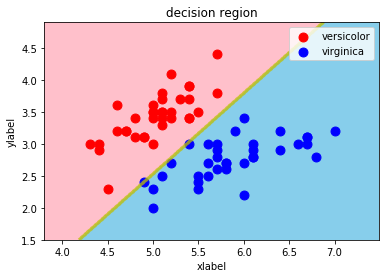

In [23]:
y.ravel()
decision_region(X,y.ravel(),log_regression,xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

# 【問題5】（アドバンス課題）重みの保存
###### 検証が容易になるように、学習した重みを保存および読み込みができるようにしましょう。
###### pickleモジュールやnumpy.savezを利用します。
###### pickle — Python オブジェクトの直列化 — Python 3.7.1 ドキュメント
###### numpy.savez — NumPy v1.15 Manual

# 以下実験用

In [416]:
#classを作成
log_regression = ScratchLogisticRegression()

In [377]:
#値を出力
# - arange：[start, stop)の連番numpy配列の生成
print('X_sample_array',np.arange(-10,10+1) )
print('X_sample_arrayをシグモイド関数に代入した結果',log_regression.sigmoid(np.arange(-10,10+1) ))

X_sample_array [-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]


AttributeError: 'ScratchLogisticRegression' object has no attribute 'sigmoid'

仮説関数の出力実験

In [40]:
X_sample = np.array([[1,2,3],[4,5,6],[7,8,9]])
y_sample = np.array([[1],[0],[0]])
log_regression.hypothesis_(X_sample)

AttributeError: 'ScratchLogisticRegression' object has no attribute 'coef_'

### 目的関数の実装

目的関数を3部分に分解  
①Σ１項目  
②Σ２項目  
③正則化項

In [402]:
#特量量が全体的に小さい値をとるとラベル１に判定されてしまうデータを作成
print(X)
print(y)

[[0 0 1]
 [0 0 2]
 [0 1 2]
 [1 1 1]]
[[0]
 [0]
 [1]
 [1]]


In [426]:
def sigmoid_(X):
    """""
    シグモイド関数の作成 #今回は一旦使わないが...
    """""
    return 1/(1+np.exp(-X))

def hypothesis(X):
        """""
        仮説関数
        X行列と重みの内積をシグモイド関数に入れる
        
        重みの初期値は全て1
        """""
        coef_ = np.ones(X.shape[1]) #クラス外での実験用
        dot = np.dot(X,coef_.reshape(-1,1))
        h_theta = sigmoid_(dot)
        return h_theta.reshape(-1,1)

In [427]:
coef_ = np.ones(X.shape[1])
coef_.reshape(-1,1)

array([[1.],
       [1.],
       [1.]])

In [428]:
#仮説関数にXを代入
np.log(hypothesis(X))

array([[-0.31326169],
       [-0.12692801],
       [-0.04858735],
       [-0.04858735]])

In [43]:
y_sample

array([[1],
       [0],
       [0]])

In [44]:
-np.dot(np.log(log_regression.hypothesis_(X_sample)),y_sample) / X_sample.shape[1]  #①を実装

AttributeError: 'ScratchLogisticRegression' object has no attribute 'coef_'

In [45]:
-np.dot(np.log(1-log_regression.hypothesis_(X_sample)),(1-y_sample)) / X_sample.shape[1] #②を実装

AttributeError: 'ScratchLogisticRegression' object has no attribute 'coef_'

In [46]:
ramda = 3
theta = np.ones(X_sample.shape[1]) #self.coef

In [47]:
ramda / (2 * X_sample.shape[1]) * sum(theta**2)

1.5

まとめ

In [48]:
((-np.dot(np.log(log_regression.hypothesis_(X_sample)),y_sample)) \
    + (-np.dot(np.log(1-log_regression.hypothesis_(X_sample)),(1-y_sample)))) \
    / X_sample.shape[1]  \
    + ramda / (2 * X_sample.shape[1]) * sum(theta**2)

AttributeError: 'ScratchLogisticRegression' object has no attribute 'coef_'

#### 　パラメータ更新の式　j>=1の場合

In [49]:
log_regression.hypothesis_(X_sample)

AttributeError: 'ScratchLogisticRegression' object has no attribute 'coef_'

In [50]:
-y_sample.T #DIVERの式はiが固定されているが今回は行列処理なので転置を忘れない

array([[-1,  0,  0]])

In [51]:
X_sample
(log_regression.hypothesis_(X_sample)-y_sample.T)
np.dot(X_sample,(log_regression.hypothesis_(X_sample)-y_sample.T).T) / X_sample.shape[1] #重み側の転置を忘れない

AttributeError: 'ScratchLogisticRegression' object has no attribute 'coef_'

In [52]:
(ramda / X_sample.shape[1]) * theta.reshape(-1,1) + np.dot(X_sample,(log_regression.hypothesis_(X_sample)-y_sample.T).T) / X_sample.shape[1]

AttributeError: 'ScratchLogisticRegression' object has no attribute 'coef_'

In [53]:
theta.reshape(-1,1)

array([[1.],
       [1.],
       [1.]])

#### 　パラメータ更新の式　j=0の場合

In [54]:
np.dot(X_sample,(log_regression.hypothesis_(X_sample)-y_sample.T).T) / X_sample.shape[1]

AttributeError: 'ScratchLogisticRegression' object has no attribute 'coef_'

In [55]:
np.ones(X_sample.shape[1])

array([1., 1., 1.])

In [56]:
np.hstack([np.c_[np.ones(X_sample.shape[0])],np.c_[X_sample]]) 

array([[1., 1., 2., 3.],
       [1., 4., 5., 6.],
       [1., 7., 8., 9.]])

In [57]:
np.c_[np.ones(X_sample.shape[0])]

array([[1.],
       [1.],
       [1.]])

ここから実験室⬇︎

In [189]:
X = np.array([[0,0,1],[0,0,2],[0,1,2],[1,1,1]])
y = np.array([[0],[0],[1],[1]])
X

array([[0, 0, 1],
       [0, 0, 2],
       [0, 1, 2],
       [1, 1, 1]])

In [223]:
loss = []
val_loss = []
coef_ = np.zeros(X.shape[1])
lr = 0.1
iter = 10

def hypothesis_(X):
        """""
        仮説関数
        X行列と重みの内積をシグモイド関数に入れる
        
        重みの初期値は全て1
        """""
        #self.coef_ = np.ones(X.shape[1]) #クラス外での実験用
        dot = np.dot(X,coef_.reshape(-1,1))
        h_theta = 1/(1+np.exp(-dot))
        return h_theta.reshape(-1,1)

hypothesis_(X)

array([[0.5],
       [0.5],
       [0.5],
       [0.5]])

In [194]:
coef_

array([0., 0., 0.])

In [195]:
hypothesis_(X)

array([[0.5],
       [0.5],
       [0.5],
       [0.5]])

In [196]:
y

array([[0],
       [0],
       [1],
       [1]])

In [197]:
hypothesis_(X) - y

array([[ 0.5],
       [ 0.5],
       [-0.5],
       [-0.5]])

In [198]:
(hypothesis_(X)- y) * X

array([[ 0. ,  0. ,  0.5],
       [ 0. ,  0. ,  1. ],
       [-0. , -0.5, -1. ],
       [-0.5, -0.5, -0.5]])

In [199]:
((hypothesis_(X)- y) * X).mean(axis=0) + (ramda / X.shape[1] * coef_)

array([-0.125, -0.25 ,  0.   ])

In [200]:
for i in range(0,iter):
        y_pred_temp = hypothesis_(X)#試行回数時点のthetaにおける予測値
        print(y_pred_temp)
        #y_val_pred_temp = hypothesis_(X_val) #試行回数時点のthetaにおけるy_val予測値
            
        #一旦 j >=　1の場合の計算式で実施
        coef_ = coef_ - lr * ((hypothesis_(X)- y) * X).mean(axis=0) + (ramda / X.shape[1] * coef_) #重み更新
        print(coef_)
        #loss[i] = ((y_pred_temp - y)**2).mean() #学習データの損失関数MSEスコアを格納してゆく
        #val_loss[i] = ((y_val_pred_temp - y_val)**2).mean() #検証データのMSEスコアを格納してゆく

[[0.5]
 [0.5]
 [0.5]
 [0.5]]
[0.0125 0.025  0.    ]
[[0.5       ]
 [0.5       ]
 [0.50624967]
 [0.5093739 ]]
[ 0.03726565  0.07460941 -0.00054683]
[[0.49986329]
 [0.49972658]
 [0.51837066]
 [0.52780335]]
[ 0.08633622  0.17306447 -0.00269019]
[[0.49932745]
 [0.49865491]
 [0.54182307]
 [0.56382749]]
[ 0.18357676  0.36848768 -0.00898315]
[[0.49775423]
 [0.49550854]
 [0.586744  ]
 [0.63252891]]
[ 0.37634029  0.75649353 -0.02533601]
[[0.49366634]
 [0.4873347 ]
 [0.66947721]
 [0.75166233]]
[ 0.75888902  1.52745858 -0.06464584]
[[0.48384417]
 [0.46772203]
 [0.80189284]
 [0.90218148]]
[ 1.5202235   3.0623153  -0.15242307]
[[0.46196784]
 [0.42437324]
 [0.9403338 ]
 [0.98822714]]
[ 3.04074132  6.12641657 -0.33433636]
[[0.4171859 ]
 [0.3387941 ]
 [0.99575493]
 [0.99985416]]
[ 6.08148628 12.25294291 -0.69582617]
[[0.33273827]
 [0.1991441 ]
 [0.99998081]
 [0.99999998]]
[12.16297256 24.5058863  -1.40992705]


In [264]:
coef_ = np.ones(X.shape[1])
coef_[1:] = coef_[1:] + 0.4
coef_

array([1. , 1.4, 1.4])

In [131]:
X_val=None

In [132]:
X_val = X
X_val

array([[0, 0, 1],
       [0, 0, 2],
       [0, 1, 2],
       [1, 1, 1]])

In [231]:
(X_val * X_val[1]).shape

(30, 4)

In [348]:
def sigmoid_(X):
    """""
    シグモイド関数の作成 #今回は一旦使わないが...
    """""
    return 1/(1+np.exp(-X))

In [353]:


def hypothesis_(X):
    """""
    仮説関数
    X行列と重みの内積をシグモイド関数に入れる
        
    重みの初期値は全て1
        
        Xの配列は(n_samples,n_features)
     
    返す値の配列は(n_sanples,1)
        
    """""
    #self.coef_ = np.ones(X.shape[1]) #クラス外での実験用
    dot = np.dot(X,coef_.reshape(-1,1))
    h_theta = sigmoid_(dot)
    return h_theta

In [354]:
hypothesis_(X)

array([[0.99999972],
       [0.99986363],
       [0.99999876],
       [0.99999848],
       [0.99999983],
       [0.99999979],
       [0.99999815],
       [0.99998763],
       [0.99999959],
       [0.99998987],
       [0.99991728],
       [0.99999917],
       [0.99988835],
       [0.99999888],
       [0.99994455],
       [0.99997508],
       [0.99999963],
       [0.9999546 ],
       [0.99999795],
       [0.99999083],
       [0.99992515],
       [0.99996637],
       [0.99999938],
       [0.99999083],
       [0.99997746],
       [0.99999985],
       [0.99990858],
       [0.99997746],
       [0.99999979],
       [0.99994983],
       [0.99995892],
       [0.99999724],
       [0.9999796 ],
       [0.99999938],
       [0.99999989],
       [0.99991728],
       [0.99999954],
       [0.99999908],
       [0.99999992],
       [0.99977518],
       [0.99996957],
       [0.99999898],
       [0.99999171],
       [0.9999833 ],
       [0.99992515],
       [0.99999944],
       [0.99999944],
       [0.999

In [366]:
hypothesis_(X)- y


ValueError: shapes (70,4) and (4900,1) not aligned: 4 (dim 1) != 4900 (dim 0)

In [379]:
from sklearn.datasets import load_iris
from sklearn import datasets
import pandas as pd

#データセット読み込み
iris = datasets.load_iris()
X = iris.data
y = iris.target


#データセットの準備 ラベルが０または１のみのデータを抜き出す。
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df_2 = df[df['target'] != 2]

#データの配列変換
X = np.array(df_2.iloc[:,:4])
y = np.array(df_2.iloc[:,4]).reshape(-1,1)

#学習データ、検証データ分割
from sklearn.model_selection import train_test_split
X, X_val, y, y_val = train_test_split(X, y,test_size=0.3)
y

array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

In [380]:
(hypothesis_(X)-y).shape

(70, 1)

In [381]:
coef_ = np.ones(X.shape[1])